In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(433, 90, 90)


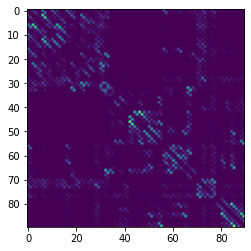

In [192]:
# load connectivity matrices
import pickle
matrices = pickle.load( open("data/matrices.p","rb" ) )
print(matrices.shape)
plt.imshow(matrices[0,:,:])

In [193]:
# convert upper triangles of the matrices to feature vectors

# dimensions
n = matrices.shape[0]
m = matrices.shape[1]

D = round(m*(m-1)/2)
print('n={}, D={}'.format(n,D))

# feature matrix
X=np.zeros([n,D])
for i in range(n):
    index=0
    for j in range(m):
        for k in range(j):
            X[i,index]=matrices[i,j,k]
            index=index+1
print(X.shape)
X

n=433, D=4005
(433, 4005)


array([[3.87819694e+02, 9.22048150e+03, 2.20766511e+02, ...,
        0.00000000e+00, 1.46054986e+04, 0.00000000e+00],
       [2.93423267e+02, 1.18512822e+04, 2.93676630e+02, ...,
        1.63412154e+00, 2.00579285e+04, 1.13951603e+00],
       [3.99800187e+02, 1.91983492e+04, 1.94759448e+02, ...,
        0.00000000e+00, 2.08952495e+04, 9.18198134e+00],
       ...,
       [1.00135770e+02, 1.21389333e+04, 4.37758515e+01, ...,
        0.00000000e+00, 2.02913541e+04, 1.69532150e-01],
       [1.99100354e+02, 1.08341242e+04, 1.98052999e+02, ...,
        0.00000000e+00, 1.26711587e+04, 6.12328380e-01],
       [1.64046676e+02, 1.04941706e+04, 1.36394112e+02, ...,
        1.92881629e-01, 1.59131950e+04, 7.15969056e-01]])

In [194]:
# load subject info
subject_info = pd.read_csv('data/subject_info.csv')
subject_info 

,age,prematurity
0,41,0
1,41,0
2,40,0
3,41,0
4,41,0
...,...,...
428,44,0
429,41,0
430,44,0
431,42,0


In [195]:
# load gray matter region descriptions - you will need this in Part B
# don't worry about the labels for now - there are here only to help you understand the dataset
label_names = pd.read_csv('data/label_names.csv')
label_names

,Label,Region name,Region description
0,1,Precentral_L,Precental gyrus
1,2,Precentral_R,Precental gyrus
2,3,Frontal_Sup_L,"Superior frontal gyrus, dorsolateral"
3,4,Frontal_Sup_R,"Superior frontal gyrus, dorsolateral"
4,5,Frontal_Sup_Orb_L,"Superior frontal gyrus, orbital part"
...,...,...,...
85,86,Temporal_Mid_R,Middle temporal gyrus
86,87,Temporal_Pole_Mid_L,Temporal pole: middle temporal gyrus
87,88,Temporal_Pole_Mid_R,Temporal pole: middle temporal gyrus
88,89,Temporal_Inf_L,Inferior temporal gyrus


In [196]:
subject_info.isnull().values.any()

False

In [197]:
from sklearn.preprocessing import MinMaxScaler

In [198]:
def normalize(dataset,a,b):
    scaler = MinMaxScaler(feature_range=(a,b))
    normalize_data = scaler.fit_transform(dataset)
    return normalize_data

In [199]:
X = normalize(X,-1,1)

In [200]:
X = pd.DataFrame(X)

In [201]:
X

,0,1,2,3,4,5,6,7,8,9,...,3995,3996,3997,3998,3999,4000,4001,4002,4003,4004
0,-0.775352,-0.663391,-0.637646,-0.786892,-0.701621,-0.669462,-0.449379,-0.509170,-0.308397,-0.638171,...,-0.683329,-0.901619,-0.402270,-1.000000,-0.401976,-1.000000,-0.080683,-1.000000,-0.439991,-1.000000
1,-0.835909,-0.383632,-0.504378,-0.847760,-0.519059,-0.541640,-0.598797,-0.232701,-0.282186,0.484251,...,-0.232697,-0.859637,0.123587,-1.000000,-0.122510,-0.963178,0.176613,-0.031532,-0.019420,-0.891659
2,-0.767666,0.397655,-0.685183,-0.850310,0.026200,-0.621503,-0.159228,-0.519636,-0.540725,-0.528554,...,-0.896461,0.155829,-0.259878,-0.527878,-0.080967,-0.614867,0.276194,-1.000000,0.045166,-0.127012
3,-0.471392,-0.348532,-0.333411,-0.795202,-0.508763,-0.242388,-0.693831,-0.408059,-0.088292,-0.428832,...,-0.797755,-0.704598,-0.195291,-0.830314,-0.635974,-0.946681,0.178398,-1.000000,-0.492266,-0.747022
4,-0.777921,0.212845,-0.513166,-0.544464,0.230143,-0.212116,0.290527,-0.905986,-0.645765,-0.248133,...,-0.475228,-0.892808,-0.081158,-1.000000,-0.598620,-1.000000,0.189785,-0.847892,-0.490914,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,-0.912200,-0.201006,-0.820986,-0.834356,-0.317826,-0.764450,-0.780748,-0.387096,-0.149249,-0.449190,...,-0.913831,-0.966037,-0.784450,-0.841449,-0.204988,-0.946860,-0.012560,-1.000000,-0.408666,-0.951028
429,-0.558071,0.718696,-0.344516,-0.440013,0.139575,-0.041048,-0.295213,-0.832659,-0.057631,-0.376309,...,-0.947993,-0.881062,-0.582569,-1.000000,-0.103108,-0.940350,0.022990,-1.000000,-0.087196,-1.000000
430,-0.959907,-0.353043,-0.961156,-0.930274,-0.279927,-0.928072,-1.000000,-1.000000,1.000000,-1.000000,...,-0.966268,-1.000000,-0.718138,-0.965657,0.410763,-1.000000,0.359025,-1.000000,-0.001415,-0.983882
431,-0.896419,-0.491796,-0.679163,-0.805703,-0.008016,-0.472977,-0.405945,-0.803969,-0.037735,-0.794617,...,-0.761016,-0.915978,-0.483867,-1.000000,-0.605737,-1.000000,-0.196190,-1.000000,-0.589195,-0.941782


In [202]:
arr = []
for i in range(0,4005):
    arr.append("char{}".format(i))

X.columns = arr
X

,char0,char1,char2,char3,char4,char5,char6,char7,char8,char9,...,char3995,char3996,char3997,char3998,char3999,char4000,char4001,char4002,char4003,char4004
0,-0.775352,-0.663391,-0.637646,-0.786892,-0.701621,-0.669462,-0.449379,-0.509170,-0.308397,-0.638171,...,-0.683329,-0.901619,-0.402270,-1.000000,-0.401976,-1.000000,-0.080683,-1.000000,-0.439991,-1.000000
1,-0.835909,-0.383632,-0.504378,-0.847760,-0.519059,-0.541640,-0.598797,-0.232701,-0.282186,0.484251,...,-0.232697,-0.859637,0.123587,-1.000000,-0.122510,-0.963178,0.176613,-0.031532,-0.019420,-0.891659
2,-0.767666,0.397655,-0.685183,-0.850310,0.026200,-0.621503,-0.159228,-0.519636,-0.540725,-0.528554,...,-0.896461,0.155829,-0.259878,-0.527878,-0.080967,-0.614867,0.276194,-1.000000,0.045166,-0.127012
3,-0.471392,-0.348532,-0.333411,-0.795202,-0.508763,-0.242388,-0.693831,-0.408059,-0.088292,-0.428832,...,-0.797755,-0.704598,-0.195291,-0.830314,-0.635974,-0.946681,0.178398,-1.000000,-0.492266,-0.747022
4,-0.777921,0.212845,-0.513166,-0.544464,0.230143,-0.212116,0.290527,-0.905986,-0.645765,-0.248133,...,-0.475228,-0.892808,-0.081158,-1.000000,-0.598620,-1.000000,0.189785,-0.847892,-0.490914,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,-0.912200,-0.201006,-0.820986,-0.834356,-0.317826,-0.764450,-0.780748,-0.387096,-0.149249,-0.449190,...,-0.913831,-0.966037,-0.784450,-0.841449,-0.204988,-0.946860,-0.012560,-1.000000,-0.408666,-0.951028
429,-0.558071,0.718696,-0.344516,-0.440013,0.139575,-0.041048,-0.295213,-0.832659,-0.057631,-0.376309,...,-0.947993,-0.881062,-0.582569,-1.000000,-0.103108,-0.940350,0.022990,-1.000000,-0.087196,-1.000000
430,-0.959907,-0.353043,-0.961156,-0.930274,-0.279927,-0.928072,-1.000000,-1.000000,1.000000,-1.000000,...,-0.966268,-1.000000,-0.718138,-0.965657,0.410763,-1.000000,0.359025,-1.000000,-0.001415,-0.983882
431,-0.896419,-0.491796,-0.679163,-0.805703,-0.008016,-0.472977,-0.405945,-0.803969,-0.037735,-0.794617,...,-0.761016,-0.915978,-0.483867,-1.000000,-0.605737,-1.000000,-0.196190,-1.000000,-0.589195,-0.941782


In [203]:
ano_label = np.column_stack((subject_info["age"],subject_info["prematurity"],X))

In [204]:
ano_label.shape

(433, 4007)

In [205]:
arr_sub = ["age","prematurity"]
arr = arr_sub+arr
len(arr)

4007

In [206]:
df = pd.DataFrame(ano_label,columns=arr)
df

,age,prematurity,char0,char1,char2,char3,char4,char5,char6,char7,...,char3995,char3996,char3997,char3998,char3999,char4000,char4001,char4002,char4003,char4004
0,41.0,0.0,-0.775352,-0.663391,-0.637646,-0.786892,-0.701621,-0.669462,-0.449379,-0.509170,...,-0.683329,-0.901619,-0.402270,-1.000000,-0.401976,-1.000000,-0.080683,-1.000000,-0.439991,-1.000000
1,41.0,0.0,-0.835909,-0.383632,-0.504378,-0.847760,-0.519059,-0.541640,-0.598797,-0.232701,...,-0.232697,-0.859637,0.123587,-1.000000,-0.122510,-0.963178,0.176613,-0.031532,-0.019420,-0.891659
2,40.0,0.0,-0.767666,0.397655,-0.685183,-0.850310,0.026200,-0.621503,-0.159228,-0.519636,...,-0.896461,0.155829,-0.259878,-0.527878,-0.080967,-0.614867,0.276194,-1.000000,0.045166,-0.127012
3,41.0,0.0,-0.471392,-0.348532,-0.333411,-0.795202,-0.508763,-0.242388,-0.693831,-0.408059,...,-0.797755,-0.704598,-0.195291,-0.830314,-0.635974,-0.946681,0.178398,-1.000000,-0.492266,-0.747022
4,41.0,0.0,-0.777921,0.212845,-0.513166,-0.544464,0.230143,-0.212116,0.290527,-0.905986,...,-0.475228,-0.892808,-0.081158,-1.000000,-0.598620,-1.000000,0.189785,-0.847892,-0.490914,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,44.0,0.0,-0.912200,-0.201006,-0.820986,-0.834356,-0.317826,-0.764450,-0.780748,-0.387096,...,-0.913831,-0.966037,-0.784450,-0.841449,-0.204988,-0.946860,-0.012560,-1.000000,-0.408666,-0.951028
429,41.0,0.0,-0.558071,0.718696,-0.344516,-0.440013,0.139575,-0.041048,-0.295213,-0.832659,...,-0.947993,-0.881062,-0.582569,-1.000000,-0.103108,-0.940350,0.022990,-1.000000,-0.087196,-1.000000
430,44.0,0.0,-0.959907,-0.353043,-0.961156,-0.930274,-0.279927,-0.928072,-1.000000,-1.000000,...,-0.966268,-1.000000,-0.718138,-0.965657,0.410763,-1.000000,0.359025,-1.000000,-0.001415,-0.983882
431,42.0,0.0,-0.896419,-0.491796,-0.679163,-0.805703,-0.008016,-0.472977,-0.405945,-0.803969,...,-0.761016,-0.915978,-0.483867,-1.000000,-0.605737,-1.000000,-0.196190,-1.000000,-0.589195,-0.941782


In [207]:
df.loc[(df.prematurity==0),'points'] = 'virginica'
df.loc[(df.prematurity==1),'points'] = 'setosa'

In [208]:
df

,age,prematurity,char0,char1,char2,char3,char4,char5,char6,char7,...,char3996,char3997,char3998,char3999,char4000,char4001,char4002,char4003,char4004,points
0,41.0,0.0,-0.775352,-0.663391,-0.637646,-0.786892,-0.701621,-0.669462,-0.449379,-0.509170,...,-0.901619,-0.402270,-1.000000,-0.401976,-1.000000,-0.080683,-1.000000,-0.439991,-1.000000,virginica
1,41.0,0.0,-0.835909,-0.383632,-0.504378,-0.847760,-0.519059,-0.541640,-0.598797,-0.232701,...,-0.859637,0.123587,-1.000000,-0.122510,-0.963178,0.176613,-0.031532,-0.019420,-0.891659,virginica
2,40.0,0.0,-0.767666,0.397655,-0.685183,-0.850310,0.026200,-0.621503,-0.159228,-0.519636,...,0.155829,-0.259878,-0.527878,-0.080967,-0.614867,0.276194,-1.000000,0.045166,-0.127012,virginica
3,41.0,0.0,-0.471392,-0.348532,-0.333411,-0.795202,-0.508763,-0.242388,-0.693831,-0.408059,...,-0.704598,-0.195291,-0.830314,-0.635974,-0.946681,0.178398,-1.000000,-0.492266,-0.747022,virginica
4,41.0,0.0,-0.777921,0.212845,-0.513166,-0.544464,0.230143,-0.212116,0.290527,-0.905986,...,-0.892808,-0.081158,-1.000000,-0.598620,-1.000000,0.189785,-0.847892,-0.490914,-1.000000,virginica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,44.0,0.0,-0.912200,-0.201006,-0.820986,-0.834356,-0.317826,-0.764450,-0.780748,-0.387096,...,-0.966037,-0.784450,-0.841449,-0.204988,-0.946860,-0.012560,-1.000000,-0.408666,-0.951028,virginica
429,41.0,0.0,-0.558071,0.718696,-0.344516,-0.440013,0.139575,-0.041048,-0.295213,-0.832659,...,-0.881062,-0.582569,-1.000000,-0.103108,-0.940350,0.022990,-1.000000,-0.087196,-1.000000,virginica
430,44.0,0.0,-0.959907,-0.353043,-0.961156,-0.930274,-0.279927,-0.928072,-1.000000,-1.000000,...,-1.000000,-0.718138,-0.965657,0.410763,-1.000000,0.359025,-1.000000,-0.001415,-0.983882,virginica
431,42.0,0.0,-0.896419,-0.491796,-0.679163,-0.805703,-0.008016,-0.472977,-0.405945,-0.803969,...,-0.915978,-0.483867,-1.000000,-0.605737,-1.000000,-0.196190,-1.000000,-0.589195,-0.941782,virginica


In [209]:
import plotly.express as px
from sklearn.decomposition import PCA

In [210]:
X = X[["char0","char1","char2","char10","char1000"]]

In [211]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)
fig = px.scatter(components,x=0,y=1,color=df["points"])
fig.show()

In [212]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [213]:
data = df
data = data.drop(["prematurity","points"],axis=1)
X = data.values
y = df["prematurity"].values

In [214]:
X

array([[ 4.10000000e+01, -7.75352197e-01, -6.63390500e-01, ...,
        -1.00000000e+00, -4.39990856e-01, -1.00000000e+00],
       [ 4.10000000e+01, -8.35909316e-01, -3.83631516e-01, ...,
        -3.15319881e-02, -1.94202849e-02, -8.91659098e-01],
       [ 4.00000000e+01, -7.67666481e-01,  3.97654594e-01, ...,
        -1.00000000e+00,  4.51660713e-02, -1.27011717e-01],
       ...,
       [ 4.40000000e+01, -9.59906952e-01, -3.53042732e-01, ...,
        -1.00000000e+00, -1.41511481e-03, -9.83881520e-01],
       [ 4.20000000e+01, -8.96419274e-01, -4.91795955e-01, ...,
        -1.00000000e+00, -5.89195242e-01, -9.41782119e-01],
       [ 4.40000000e+01, -9.18906880e-01, -5.27946575e-01, ...,
        -8.85688008e-01, -3.39122325e-01, -9.31928353e-01]])

In [215]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [216]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.25)

In [217]:
Xtrain.shape,ytrain.shape

((324, 4006), (324,))

In [218]:
Xtest.shape,ytest.shape

((109, 4006), (109,))

In [219]:
pca = PCA()
components = pca.fit_transform(Xtrain)
fig = px.scatter(components,x=0,y=1)
fig.show()

In [220]:
pca = PCA()
components = pca.fit_transform(Xtest)
fig = px.scatter(components,x=0,y=1)
fig.show()

In [221]:
random_forest = RandomForestClassifier()
random_forest.fit(Xtrain,ytrain)

RandomForestClassifier()

In [222]:
param_test = {"n_estimators":range(1,101,10)}
gsearch1 =  GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_test,scoring="roc_auc",cv=10)
gsearch1.fit(Xtrain,ytrain)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(1, 101, 10)}, scoring='roc_auc')

In [223]:
gsearch1.best_params_,gsearch1.best_score_

({'n_estimators': 61}, 0.9126373626373626)

In [225]:
param_test2 = {"max_features":range(1,11,1)}
gsearch1 =  GridSearchCV(estimator=RandomForestClassifier(n_estimators=61,random_state=10),param_grid=param_test2,scoring="roc_auc",cv=10)
gsearch1.fit(Xtrain,ytrain)
gsearch1.best_params_,gsearch1.best_score_

({'max_features': 5}, 0.8992216117216116)

In [235]:
rf0 = RandomForestClassifier(n_estimators=61,max_features=5,oob_score=True,random_state=10)
rf0.fit(Xtrain,ytrain)
rf0.oob_score_

0.8148148148148148

In [228]:
y_pred = random_forest.predict(Xtest)
accuracy_score = random_forest.score(Xtest,ytest)
accuracy_score

0.8348623853211009

In [229]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [230]:
ytest

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [231]:
y_pred == ytest

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True])

In [233]:
from collections import Counter
Counter(y_pred==ytest)[True],Counter(y_pred==ytest)[False]

(91, 18)

In [236]:
cross_val_score(random_forest,X,y,cv=5)

array([0.82758621, 0.82758621, 0.7816092 , 0.8372093 , 0.8372093 ])

In [238]:
y_pred,ytest

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0.]))

In [240]:
y_pred.shape,ytest.shape

((109,), (109,))

In [241]:
pca_data = np.column_stack((y_pred,ytest))

In [242]:
pca_data = pd.DataFrame(pca_data,columns=['Predictions','TrueLabels'])

In [243]:
pca_data

,Predictions,TrueLabels
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
104,0.0,0.0
105,0.0,0.0
106,0.0,0.0
107,0.0,0.0


In [244]:
pca_data["Predictions"].value_counts()

0.0    102
1.0      7
Name: Predictions, dtype: int64

In [245]:
pca_data["TrueLabels"].value_counts()

0.0    86
1.0    23
Name: TrueLabels, dtype: int64

In [246]:
pca_data.loc[(pca_data.Predictions==0),'color1'] = "virginica"
pca_data.loc[(pca_data.Predictions==1),'color1'] = "setosa"

In [247]:
pca_data

,Predictions,TrueLabels,color1
0,0.0,0.0,virginica
1,0.0,0.0,virginica
2,0.0,0.0,virginica
3,0.0,0.0,virginica
4,0.0,0.0,virginica
...,...,...,...
104,0.0,0.0,virginica
105,0.0,0.0,virginica
106,0.0,0.0,virginica
107,0.0,0.0,virginica


In [248]:
pca_data.loc[(pca_data.TrueLabels==0),'color2'] = "virginica"
pca_data.loc[(pca_data.TrueLabels==1),'color2'] = "setosa"

In [249]:
pca_data

,Predictions,TrueLabels,color1,color2
0,0.0,0.0,virginica,virginica
1,0.0,0.0,virginica,virginica
2,0.0,0.0,virginica,virginica
3,0.0,0.0,virginica,virginica
4,0.0,0.0,virginica,virginica
...,...,...,...,...
104,0.0,0.0,virginica,virginica
105,0.0,0.0,virginica,virginica
106,0.0,0.0,virginica,virginica
107,0.0,0.0,virginica,virginica


In [251]:
X = pca_data[['Predictions']]

pca = PCA(n_components=1)
components = pca.fit_transform(X)
fig = px.scatter(components,color=pca_data["color1"])
fig.show()

In [252]:
X1 = pca_data[['TrueLabels']]

pca = PCA(n_components=1)
components = pca.fit_transform(X)
fig = px.scatter(components,color=pca_data["color2"])
fig.show()